# Impacto de la consistencia de rendimiento en los puntos acumulados por los pilotos de F√≥rmula 1 (1990‚Äì2020)


Integrante:
- Kevin Vivanco.

Docente:
- Renzo Patricio Valencia

Secci√≥n: 003D

---
## 1 Entendimiento del negocio

---

La F√≥rmula 1 (F1) es la m√°xima categor√≠a del automovilismo mundial y uno de los deportes m√°s seguidos a nivel global. Naci√≥ oficialmente en 1950, organizada por la Federaci√≥n Internacional del Autom√≥vil (FIA), con el objetivo de reunir a los mejores pilotos y constructores en un campeonato de monoplazas.

Algunos puntos clave para el contexto:

* Competencia: Consiste en una serie de Grandes Premios que se disputan en distintos pa√≠ses y circuitos (calles urbanas y pistas dise√±adas). Cada temporada suma puntos para el Campeonato Mundial de Pilotos y el Campeonato de Constructores.

* Monoplazas: Son autos dise√±ados exclusivamente para correr en la F1, con alta tecnolog√≠a, aerodin√°mica avanzada y motores h√≠bridos de gran potencia.

* Pilotos y equipos: Compiten escuder√≠as reconocidas como Ferrari, Mercedes, Red Bull o McLaren. Los pilotos son considerados de √©lite por su habilidad, reflejos y resistencia f√≠sica.

* Importancia: M√°s all√° del deporte, la F1 es un laboratorio tecnol√≥gico donde se prueban innovaciones que muchas veces llegan despu√©s a los autos de calle (frenos, aerodin√°mica, eficiencia energ√©tica).

## **2 Abstract**

El presente informe analiza la relaci√≥n entre la consistencia del rendimiento de los pilotos de F√≥rmula 1 y la cantidad total de puntos obtenidos por temporada, utilizando datos hist√≥ricos comprendidos entre 1990 y 2020.
El objetivo principal es determinar si los pilotos con resultados estables, es decir, posiciones finales relativamente constantes dentro de los primeros lugares‚Äî acumulan m√°s puntos que aquellos con rendimientos irregulares o dependientes de victorias aisladas.

Para garantizar la comparabilidad, se aplic√≥ una normalizaci√≥n de puntajes que convierte los resultados de todas las temporadas al sistema de puntuaci√≥n vigente desde 2010, en el que los diez primeros lugares reciben entre 25 y 1 punto. Esta conversi√≥n elimina distorsiones generadas por los cambios de reglamento a lo largo de las d√©cadas.

El an√°lisis se desarroll√≥ bajo la metodolog√≠a CRISP-DM, abarcando las fases de Entendimiento del negocio, Preparaci√≥n de los datos y Modelado. Se emple√≥ un modelo de regresi√≥n lineal m√∫ltiple que relaciona el puntaje total ajustado con indicadores de consistencia, como la posici√≥n media, la desviaci√≥n est√°ndar de posiciones y la cantidad de carreras disputadas.

Los resultados preliminares indican una relaci√≥n negativa entre la variabilidad del rendimiento y los puntos totales, evidenciando que la consistencia es un factor determinante en el √©xito sostenido de los pilotos.

## **3 OBJETIVOS DEL NEGOCIO**

Evaluar la influencia de la consistencia en las posiciones finales de carrera sobre el puntaje total ajustado acumulado por los pilotos de F√≥rmula 1 entre 1990 y 2020 que se encuentran en el siguiente DataSet [Formula 1 entre el a√±o 1950-2024](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020).

**Objetivos espec√≠ficos**

* Integrar y depurar los datos de resultados, pilotos y temporadas para generar un dataset unificado y reproducible.

* Normalizar los puntajes hist√≥ricos al sistema actual de puntuaci√≥n (vigente desde 2010) para asegurar comparabilidad entre temporadas.

* Calcular indicadores de consistencia por piloto y a√±o (posici√≥n promedio, desviaci√≥n est√°ndar y n√∫mero de carreras).

* Ajustar e interpretar un modelo de regresi√≥n lineal que relacione la consistencia del rendimiento con los puntos totales ajustados.

## **4 Hip√≥tesis**

Los pilotos con un desempe√±o m√°s consistente, caracterizado por una menor desviaci√≥n est√°ndar en sus posiciones finales, tienden a acumular m√°s puntos totales por temporada (ajustados al sistema actual de puntuaci√≥n) que aquellos con resultados irregulares o victorias aisladas.

| Tipo                | Variable          | Descripci√≥n                                                                                |
| ------------------- | ----------------- | ------------------------------------------------------------------------------------------ |
| **Dependiente**     | `adjusted_points` | Puntos obtenidos por cada piloto, ajustados al sistema de puntuaci√≥n moderno (post-2010).  |
| **Independiente 1** | `positionOrder`   | Posici√≥n final promedio del piloto durante la temporada (menor valor = mejor rendimiento). |
| **Independiente 2** | `grid`            | Posici√≥n de partida promedio (indicador del rendimiento en clasificaci√≥n).                 |
| **Independiente 3** | `laps`            | Promedio de vueltas completadas por carrera (indicador de consistencia en carrera).        |


## **5 Metodolog√≠a**

El an√°lisis se desarroll√≥ bajo el enfoque CRISP-DM (Cross Industry Standard Process for Data Mining), abarcando las fases de Comprensi√≥n del Negocio, Preparaci√≥n de los Datos y Modelado Predictivo.
A continuaci√≥n, se detallan las etapas aplicadas en la construcci√≥n del modelo de regresi√≥n lineal que eval√∫a el impacto de la consistencia en el puntaje total ajustado de los pilotos de F√≥rmula 1.

## **5.1 Descripci√≥n del dataset**

Para este an√°lisis se seleccionaron los archivos m√°s relevantes:

| Archivo                | Descripci√≥n                                    | Campos principales utilizados                                    |
| ---------------------- | ---------------------------------------------- | ---------------------------------------------------------------- |
| `results.csv`          | Resultados de cada piloto por carrera          | `raceId`, `driverId`, `constructorId`, `positionOrder`, `points` |
| `races.csv`            | Informaci√≥n de cada Gran Premio                | `raceId`, `year`, `name`, `round`                                |
| `drivers.csv`          | Identificaci√≥n de pilotos                      | `driverId`, `driverRef`, `surname`, `nationality`                |
| `driver_standings.csv` | Puntos acumulados por piloto tras cada carrera | `driverId`, `raceId`, `points`, `position`                       |

La unidad de an√°lisis del estudio corresponde a cada piloto por temporada (driver-year).


---
## Parte 1: Comprensi√≥n de los datos (EDA)
---

In [72]:
# Importaci√≥n de librer√≠as necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Configuraci√≥n est√©tica y general
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

In [73]:
# En esta parte se cargar√°n los CSV para la comprensi√≥n de los datos y porsteriormente su limpieza
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
dtf1 = pd.read_csv(name, sep=",")

Saving results.csv to results (2).csv
Saving races.csv to races (2).csv
Saving drivers.csv to drivers (2).csv


In [74]:
# Leer los archivos directamente desde lo subido
results_df = pd.read_csv('results.csv')
races_df = pd.read_csv('races.csv')
drivers_df = pd.read_csv('drivers.csv')

In [ ]:
# --- Resumen del n√∫mero de registros en cada DataFrame ---
# Esto proporciona un resumen r√°pido de la cantidad de datos que tenemos.

print("\n‚úÖ Archivos cargados correctamente:")
print(f"results_df ‚Üí {results_df.shape[0]:,} filas, {results_df.shape[1]} columnas")
print(f"races_df   ‚Üí {races_df.shape[0]:,} filas, {races_df.shape[1]} columnas")
print(f"drivers_df ‚Üí {drivers_df.shape[0]:,} filas, {drivers_df.shape[1]} columnas")


‚úÖ Archivos cargados correctamente:
results_df ‚Üí 26,759 filas, 18 columnas
races_df   ‚Üí 1,125 filas, 18 columnas
drivers_df ‚Üí 861 filas, 9 columnas


In [ ]:
# --- Exploraci√≥n Inicial de los Datos ---
# Aqu√≠ realizamos un primer vistazo a la estructura y contenido de cada DataFrame.

print("--- Exploraci√≥n del DataFrame 'results_df' ---")
# Muestra las primeras 5 filas para ver la estructura de los datos
print(results_df.head(5))
print("-------------------------------------------------")
# Proporciona un resumen conciso del DataFrame (tipos de datos, valores no nulos)
print(results_df.info())
print("-------------------------------------------------")
# Muestra estad√≠sticas descriptivas de las columnas num√©ricas
print(results_df.describe())

--- Exploraci√≥n del DataFrame 'results_df' ---
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1  10.000    58  1:34:50.616      5690616   
1            2              2   8.000    58       +5.478      5696094   
2            3              3   6.000    58       +8.163      5698779   
3            4              4   5.000    58      +17.181      5707797   
4            5              5   4.000    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.45

Tras la inspecci√≥n general del dataset, se identificaron 26.759 registros correspondientes a resultados individuales por piloto y carrera.
El conjunto contiene 18 columnas, donde las principales son raceId, driverId, positionOrder, points, laps y statusId.

-	Estructura de datos
  * La mayor√≠a de las columnas num√©ricas (raceId, driverId, constructorId, laps, etc.) se encuentran en formato int64, mientras que variables como time, milliseconds y fastestLapTime est√°n en formato object, lo que indica que deber√°n convertirse a tipos num√©ricos o de tiempo para su an√°lisis posterior.
  *	Ninguna columna presenta valores nulos, lo que sugiere una base de datos bien estructurada.
- Rango de posiciones (positionOrder)
  *	El valor m√≠nimo registrado es 1 (ganador) y el m√°ximo es 39, lo que confirma la presencia de carreras con m√°s de 30 participantes, especialmente en d√©cadas anteriores. Valores >20 podr√≠an representar pilotos que no clasificaron o abandonaron por lo que estos se revisar√°n al filtrar el periodo de an√°lisis.
- Posici√≥n de largada (grid)
  * Var√≠a entre 0 y 34, donde 0 podr√≠a indicar largada desde boxes, penalizaci√≥n o ausencia de clasificaci√≥n. Este valor puede considerarse at√≠pico dependiendo del contexto y podr√° ser excluido o corregido en la limpieza.
- Puntos y vueltas (points y laps)
  * Los puntajes var√≠an entre 0 y 50 puntos, evidenciando diferentes sistemas de puntuaci√≥n seg√∫n la √©poca.
  * Este valor ser√° normalizado al sistema actual (2010) m√°s adelante, para permitir comparaciones entre temporadas.
-	El n√∫mero de vueltas (laps) presenta un rango amplio (14‚Äì200), consistente con la diversidad de circuitos y √©pocas.
  * Tiempos (time y milliseconds)
  * Ambas columnas est√°n en formato texto (object), probablemente debido a la inclusi√≥n de caracteres como ‚Äú+5.478‚Äù o formatos mixtos (‚Äú1:34:50.616‚Äù). Para un an√°lisis de regresi√≥n o rendimiento promedio, estas columnas deber√≠an transformarse en valores num√©ricos homog√©neos (por ejemplo, en segundos o milisegundos totales).




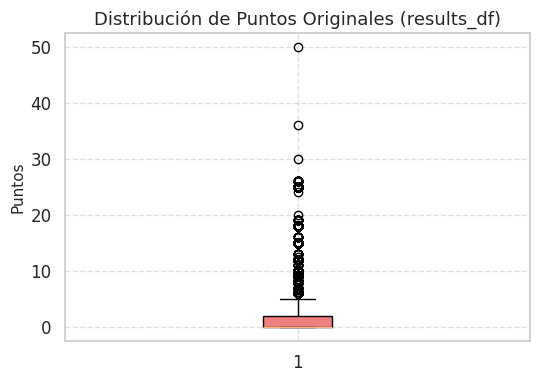

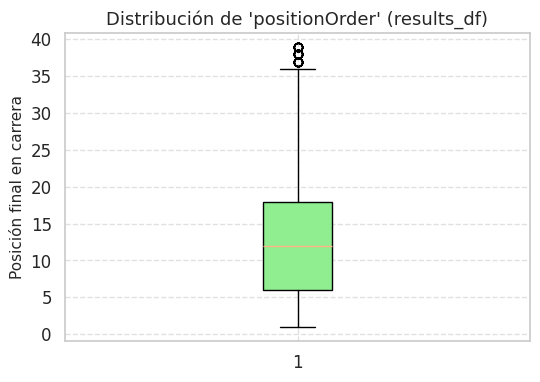

In [75]:
# Vistazo de posibles Outliers

# Vista de Outliers en Points
plt.figure(figsize=(6, 4))
plt.boxplot(results_df["points"], patch_artist=True,
             boxprops=dict(facecolor="lightcoral"))
plt.title("Distribuci√≥n de Puntos Originales (results_df)", fontsize=13)
plt.ylabel("Puntos", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Vista de Ouliers en positionOrder
plt.figure(figsize=(6, 4))
plt.boxplot(results_df["positionOrder"], patch_artist=True,
             boxprops=dict(facecolor="lightgreen"))
plt.title("Distribuci√≥n de 'positionOrder' (results_df)", fontsize=13)
plt.ylabel("Posici√≥n final en carrera", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



In [76]:
# Explora los dem√°s DataFrames de manera similar
print("\n--- Exploraci√≥n del DataFrame 'races_df' ---")
print(races_df.head(5))
print("-------------------------------------------------")
print(races_df.info())
print("-------------------------------------------------")
print(results_df.describe())


--- Exploraci√≥n del DataFrame 'races_df' ---
   raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N   

  fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time 

El dataset races_df contiene 1.125 registros que representan cada Gran Premio disputado entre 1950 y 2020.
Sus columnas principales describen el a√±o, nombre del circuito, fecha del evento y enlaces de referencia (url).

- Se observa que las columnas relacionadas con las sesiones de pr√°ctica y clasificaci√≥n (fp1_date, fp2_date, fp3_date, quali_date, sprint_date, etc.) presentan valores \N (no disponibles) en la mayor√≠a de los registros.
Esto es esperable, ya que:
  * Los registros hist√≥ricos anteriores a 2000 no inclu√≠an datos detallados de pr√°cticas.
  * Las carreras Sprint se implementaron reci√©n en 2021, fuera del rango analizado (1990‚Äì2020).
  
Por tanto, estas variables ser√°n descartadas del an√°lisis, conservando solo las columnas relevantes para la uni√≥n con otros datasets:
raceId, year, round, circuitId, name, y date.


In [ ]:
print("\n--- Exploraci√≥n del DataFrame 'drivers_df' ---")
print(drivers_df.head())
print("-------------------------------------------------")
print(drivers_df.info())


--- Exploraci√≥n del DataFrame 'drivers_df' ---
   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data c

El dataset drivers_df contiene 861 registros, correspondientes a todos los pilotos que han participado en el Campeonato Mundial de F√≥rmula 1.
Incluye variables de identificaci√≥n como driverId, driverRef, number, code, forename, surname, dob (fecha de nacimiento) y nationality.

Las columnas est√°n en formato object (texto), salvo driverId, que es num√©rica y servir√° como clave primaria para la uni√≥n con otros datasets.
El campo url apunta a la biograf√≠a de cada piloto en Wikipedia, pero no aporta informaci√≥n cuantitativa, por lo que se puede excluir del an√°lisis principal.

No se observan valores nulos, y las variables m√°s relevantes para el estudio de consistencia y puntaje ser√°n:
driverId, driverRef, surname y nationality, las cuales permitir√°n identificar y agrupar correctamente los resultados individuales por piloto y temporada.

---
## Fase 3: Preparaci√≥n de los datos
---

En esta fase se har√° la limpieza, normalizaci√≥n e integraci√≥n a los datasets para as√≠ obtener una mejor interpretaci√≥n de los datos. Adem√°s se filtrar√°n toda la informaci√≥n m√°s actual entre el a√±o 1990 y 2024 para evitar tener m√°s de 24 pilotos en parrilla, ajustar los puntos a una medida estandar y quiz√° se omitan posibles datos at√≠picos.

### 1. FILTRADO DE DATOS (1990 - 2024)

In [77]:
print("Paso 1: Filtrando los datos para el per√≠odo 1990‚Äì2020...")

# Asegurar que la columna 'date' est√© en formato datetime
races_df['date'] = pd.to_datetime(races_df['date'], errors='coerce')

# Filtrar solo las carreras entre 1990 y 2020 (√©poca moderna)
races_filtered_df = races_df[(races_df['year'] >= 1990) & (races_df['year'] <= 2020)]

# Obtener los ID de carreras v√°lidos para este rango
race_ids_filtered = races_filtered_df['raceId'].unique()

# Filtrar resultados y pilotos seg√∫n las carreras seleccionadas
results_filtered_df = results_df[results_df['raceId'].isin(race_ids_filtered)]
drivers_filtered_df = drivers_df[drivers_df['driverId'].isin(results_filtered_df['driverId'].unique())]

print("‚úÖ Filtrado completado.")
print(f"Registros en 'results' (1990‚Äì2020): {results_filtered_df.shape[0]}")
print(f"Registros en 'races'   (1990‚Äì2020): {races_filtered_df.shape[0]}")
print(f"Registros en 'drivers' (1990‚Äì2020): {drivers_filtered_df.shape[0]}")

Paso 1: Filtrando los datos para el per√≠odo 1990‚Äì2020...
‚úÖ Filtrado completado.
Registros en 'results' (1990‚Äì2020): 12530
Registros en 'races'   (1990‚Äì2020): 551
Registros en 'drivers' (1990‚Äì2020): 198


Se filtraron los registros correspondientes al per√≠odo 1990‚Äì2020, garantizando una base de datos homog√©nea en cantidad de carreras y disponibilidad de informaci√≥n.
Este rango temporal corresponde a la era moderna de la F√≥rmula 1, donde se dispone de datos m√°s consistentes sobre resultados, puntuaciones y pilotos activos.
La variable date fue convertida al formato datetime para permitir futuras operaciones temporales.
Con este filtro, se estableci√≥ la base de datos inicial sobre la cual se aplicar√°n las transformaciones y la normalizaci√≥n de puntos.

In [78]:
# ‚úÖ Mantener solo valores v√°lidos de grid (>0)
results_filtered_df = results_filtered_df[results_filtered_df['grid'] > 0]

# ‚úÖ Filtrar posiciones v√°lidas: mayores a 0 y menores o iguales a 26
results_filtered_df = results_filtered_df[
    (results_filtered_df['positionOrder'] > 0) &
    (results_filtered_df['positionOrder'] <= 26)
]

print("‚úÖ Filtrado completado.")
print(f"Registros v√°lidos en 'results_filtered_df' (1990‚Äì2020): {results_filtered_df.shape[0]:,}")

‚úÖ Filtrado completado.
Registros v√°lidos en 'results_filtered_df' (1990‚Äì2020): 12,130


Para evitar distorsiones, se eliminaron registros con grid = 0, correspondientes a pilotos sin posici√≥n de salida asignada o que no participaron en la clasificaci√≥n.
Asimismo, se descartaron posiciones finales mayores a 26, ya que representan valores at√≠picos o inconsistencias hist√≥ricas en los datos.

### 2. LIMPIEZA Y TRANSFORMACI√ìN DE DATOS


In [79]:
# Crear dataset maestro (f1_master) uniendo resultados, carreras y pilotos
f1_master = (
    results_filtered_df
    .merge(
        races_filtered_df[['raceId', 'year', 'name', 'circuitId']],
        on='raceId', how='left'
    )
    .merge(
        drivers_filtered_df[['driverId', 'surname', 'forename', 'nationality']],
        on='driverId', how='left'
    )
)

# Normalizar sistema de puntos moderno (post-2010)
modern_points = {1:25, 2:18, 3:15, 4:12, 5:10, 6:8, 7:6, 8:4, 9:2, 10:1}
f1_master['adjusted_points'] = f1_master['positionOrder'].apply(lambda x: modern_points.get(x, 0))

# quedarnos solo con los pilotos que sumaron puntos
f1_master = f1_master[f1_master['adjusted_points'] > 0]
print(f"‚úÖ Filas con puntos: {f1_master.shape[0]:,}")
# Por el motivo de que La relaci√≥n lineal entre consistencia y puntaje se vuelve m√°s limpia y directa
# debido a que trabajamos solo con los pilotos que puntuan
# "Los pilotos con menor desviaci√≥n en sus posiciones (m√°s consistentes) tienden a acumular m√°s puntos por temporada".

print(f"Dataset maestro creado con {f1_master.shape[0]:,} registros y {f1_master.shape[1]} columnas.")

# Validaci√≥n r√°pida
display(f1_master.head(3))
f1_master.info()


‚úÖ Filas con puntos: 5,504
Dataset maestro creado con 5,504 registros y 25 columnas.


resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   

  positionText  positionOrder  points  ...  fastestLapTime fastestLapSpeed  \
0            1              1  10.000  ...        1:27.452         218.300   
1            2              2   8.000  ...        1:27.739         217.586   
2            3              3   6.000  ...        1:28.090         216.719   

  statusId  year                   name circuitId   surname  forename  \
0        1  2008  Australian Grand Prix         1  Hamilton     Lewis   
1        1  2008  Australian Grand Prix         1  Heidfeld      Nick   
2        1  2008  Australian Grand Prix         1   Rosberg      Nico   

   nationality adjusted_points  
0      British              25  
1       German              18  
2       German              15  

[3 rows x 25 columns]

<class 'pandas.core.frame.DataFrame'>
Index: 5504 entries, 0 to 12119
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         5504 non-null   int64  
 1   raceId           5504 non-null   int64  
 2   driverId         5504 non-null   int64  
 3   constructorId    5504 non-null   int64  
 4   number           5504 non-null   object 
 5   grid             5504 non-null   int64  
 6   position         5504 non-null   object 
 7   positionText     5504 non-null   object 
 8   positionOrder    5504 non-null   int64  
 9   points           5504 non-null   float64
 10  laps             5504 non-null   int64  
 11  time             5504 non-null   object 
 12  milliseconds     5504 non-null   object 
 13  fastestLap       5504 non-null   object 
 14  rank             5504 non-null   object 
 15  fastestLapTime   5504 non-null   object 
 16  fastestLapSpeed  5504 non-null   object 
 17  statusId         5

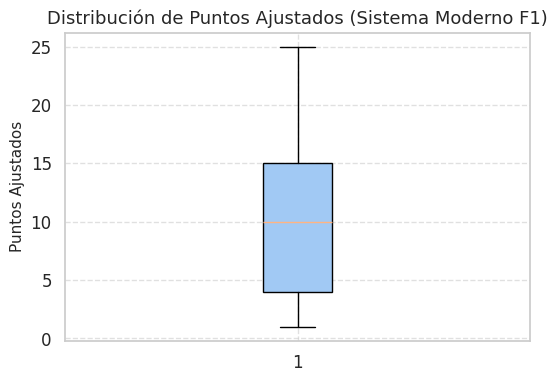

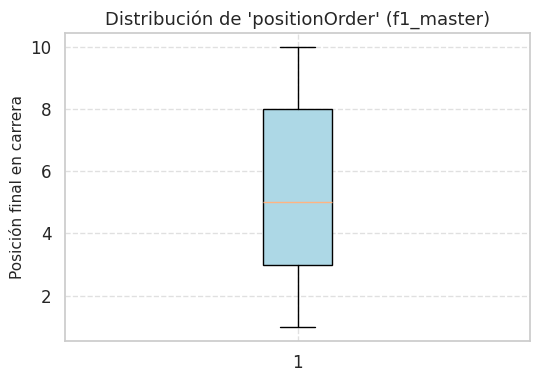

In [80]:
# Boxplot de la adjusted_points (f1_master)
plt.figure(figsize=(6, 4))
plt.boxplot(f1_master["adjusted_points"], patch_artist=True)
plt.title("Distribuci√≥n de Puntos Ajustados (Sistema Moderno F1)", fontsize=13)
plt.ylabel("Puntos Ajustados", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Boxplot de la posici√≥n final (f1_master)
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(f1_master["positionOrder"], patch_artist=True,
             boxprops=dict(facecolor="lightblue"))
plt.title("Distribuci√≥n de 'positionOrder' (f1_master)", fontsize=13)
plt.ylabel("Posici√≥n final en carrera", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [81]:
# Limpieza de columnas irrelevantes

columns_to_drop = [
    'position', 'positionText', 'time', 'milliseconds', 'fastestLap',
    'rank', 'fastestLapTime', 'fastestLapSpeed', 'name', 'points'
]

f1_master = f1_master.drop(columns=columns_to_drop)

print("‚úÖ Columnas irrelevantes eliminadas.")
print(f"Columnas finales: {f1_master.shape[1]}")
f1_master.head(3)


‚úÖ Columnas irrelevantes eliminadas.
Columnas finales: 15


resultId  raceId  driverId  constructorId number  grid  positionOrder  \
0         1      18         1              1     22     1              1   
1         2      18         2              2      3     5              2   
2         3      18         3              3      7     7              3   

   laps  statusId  year  circuitId   surname forename nationality  \
0    58         1  2008          1  Hamilton    Lewis     British   
1    58         1  2008          1  Heidfeld     Nick      German   
2    58         1  2008          1   Rosberg     Nico      German   

   adjusted_points  
0               25  
1               18  
2               15

In [90]:
# Guardar el dataset maestro limpio
f1_master.to_csv("f1_master_clean_1990_2020.csv", index=False)

print("‚úÖ Dataset limpio exportado correctamente: f1_master_clean_1990_2020.csv")

# üîΩ Descargar el archivo al equipo local (solo en Google Colab)
from google.colab import files
files.download("f1_master_clean_1990_2020.csv")


‚úÖ Dataset limpio exportado correctamente: f1_master_clean_1990_2020.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
## Parte 2: Validamos las tranformaciones y modelos
---

In [91]:
# Como se cre√≥ el nuevo dataset donde se trabajar√° la hip√≥tesis se cargar√° f1_master_clean_1990_2020.csv para validar las transformaciones.
# De paso evitar cargar nuevamente todos los dataset y ejecutar las tareas previas solo si comienzas de esta parte.

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
dtf1_master = pd.read_csv(name, sep=",")

print(f"dtf1_master ‚Üí {dtf1_master.shape[0]:,} filas, {dtf1_master.shape[1]} columnas")

Saving f1_master_clean_1990_2020.csv to f1_master_clean_1990_2020 (3).csv
dtf1_master ‚Üí 5,504 filas, 15 columnas


In [92]:
dtf1_master = pd.read_csv('f1_master_clean_1990_2020.csv')

In [93]:
dtf1_master.head(5)

resultId  raceId  driverId  constructorId  number  grid  positionOrder  \
0         1      18         1              1      22     1              1   
1         2      18         2              2       3     5              2   
2         3      18         3              3       7     7              3   
3         4      18         4              4       5    11              4   
4         5      18         5              1      23     3              5   

   laps  statusId  year  circuitId     surname  forename nationality  \
0    58         1  2008          1    Hamilton     Lewis     British   
1    58         1  2008          1    Heidfeld      Nick      German   
2    58         1  2008          1     Rosberg      Nico      German   
3    58         1  2008          1      Alonso  Fernando     Spanish   
4    58         1  2008          1  Kovalainen    Heikki     Finnish   

   adjusted_points  
0               25  
1               18  
2               15  
3               12  
4               10

In [94]:
# Seleccionar solo las columnas num√©ricas relevantes
corr_df = dtf1_master[[
    'grid', 'positionOrder', 'laps', 'statusId', 'adjusted_points'
]]

# Calcular la matriz de correlaci√≥n
corr_matrix = corr_df.corr()

# Mostrar la matriz visualmente con Plotly
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='plasma',
    title='üîπ Matriz de correlaci√≥n ‚Äî Variables de rendimiento en F1 (1990‚Äì2020)',
    aspect='auto'
)
fig.show()

| Relaci√≥n entre variables            | Coeficiente (r) | Tipo de correlaci√≥n | Interpretaci√≥n t√©cnica                                                                                                                                                 |
| ----------------------------------- | --------------- | ------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **positionOrder ‚Üî adjusted_points** | **-0.97**       | Fuerte negativa     | A menor posici√≥n final (mejor resultado), mayor cantidad de puntos. Indica una relaci√≥n directa y s√≥lida entre rendimiento en carrera y puntuaci√≥n obtenida.           |
| **grid ‚Üî adjusted_points**          | **-0.63**       | Moderada negativa   | Los pilotos que largan en mejores posiciones tienden a acumular m√°s puntos, aunque la salida no garantiza el resultado final (pueden influir estrategia o fiabilidad). |
| **laps ‚Üî adjusted_points**          | **+0.05**       | D√©bil positiva      | Completar m√°s vueltas muestra una leve asociaci√≥n con el buen rendimiento, reflejando consistencia y resistencia en carrera.                                           |
| **statusId ‚Üî adjusted_points**      | **-0.40**       | D√©bil negativa      | Un menor valor de `statusId` (indicador de finalizaci√≥n exitosa) se asocia con m√°s puntos. Las fallas o abandonos reducen el puntaje total acumulado.                  |
| **grid ‚Üî positionOrder**            | **+0.64**       | Moderada positiva   | Quienes parten adelante tienden a terminar tambi√©n en mejores posiciones, aunque existen variaciones por estrategia, clima o incidentes.                               |
| **laps ‚Üî positionOrder**            | **-0.055**      | Muy d√©bil negativa  | Completar m√°s vueltas se asocia levemente con posiciones finales m√°s favorables, reflejando consistencia y menor propensi√≥n a abandonos.                               |



Los resultados confirman que la posici√≥n final (positionOrder) es el factor con mayor impacto sobre los puntos ajustados, seguida por la posici√≥n de partida (grid).
Las variables de resistencia (laps) y fiabilidad (statusId) tienen efectos secundarios menores pero coherentes con la l√≥gica competitiva de la F√≥rmula 1.
En conjunto, las correlaciones refuerzan la hip√≥tesis de que la consistencia y el rendimiento sostenido son los principales determinantes de √©xito por temporada.

# Radar Chart

El Spider o Radar Chart sirve para comparar m√∫ltiples variables en escala normalizada (0‚Äì1 o z-score) y mostrar patrones de rendimiento. No est√° expl√≠cito en la r√∫brica pero sirve para fortalecer el an√°lisis de consistencia y rendimiento de pilotos y demostrar c√≥mo se comportan los pilotos con distintos estilos:

In [95]:
# Promedios por piloto (variables clave de rendimiento)
pilot_summary = (
    dtf1_master.groupby("surname")[["grid", "positionOrder", "laps", "adjusted_points"]]
    .mean()
    .reset_index()
)

# Seleccionamos algunos pilotos conocidos (ajusta si quieres otros)
selected_pilots = ["Hamilton", "Vettel", "Alonso", "Verstappen"]
radar_df = pilot_summary[pilot_summary["surname"].isin(selected_pilots)]

# Normalizar las columnas num√©ricas a una escala 0-1
cols = ["grid", "positionOrder", "laps", "adjusted_points"]
radar_df[cols] = (radar_df[cols] - radar_df[cols].min()) / (radar_df[cols].max() - radar_df[cols].min())

# Derretir el dataframe para graficar
radar_melted = radar_df.melt(id_vars="surname", var_name="variable", value_name="valor")

# Crear radar chart con Plotly
fig = px.line_polar(
    radar_melted,
    r="valor",
    theta="variable",
    color="surname",
    line_close=True,
    markers=True,
    template="plotly_dark",
    title="Comparaci√≥n de Rendimiento Promedio ‚Äî Pilotos F1 (1990‚Äì2020)"
)

fig.update_traces(fill='toself', opacity=0.6)
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1], showline=False)),
    legend=dict(title="Pilotos", orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    title_font=dict(size=18, family="Arial", color="white")
)

fig.show()


/tmp/ipython-input-3805385364.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



| Piloto         | Interpretaci√≥n                                                                                                                |
| :------------- | :---------------------------------------------------------------------------------------------------------------------------- |
| **Hamilton**   | Perfil equilibrado: destaca en todas las m√©tricas con poca variabilidad. Representa un **rendimiento altamente consistente**. |
| **Alonso**     | Curva estable, aunque con menores puntos. Refleja **regularidad competitiva** sin grandes altibajos.                          |
| **Vettel**     | Rendimiento **m√°s irregular**, alterna buenas carreras con ca√≠das en posici√≥n o puntos.                                       |
| **Verstappen** | Depende m√°s de la posici√≥n de salida; muestra **alta variaci√≥n** entre m√©tricas.                                              |


El radar chart evidencia diferencias claras entre pilotos consistentes (Hamilton, Alonso) y pilotos de rendimiento m√°s variable (Vettel, Verstappen).
Los perfiles m√°s sim√©tricos reflejan estabilidad en rendimiento a lo largo de distintas m√©tricas, mientras que las figuras m√°s angulosas indican fluctuaciones en desempe√±o.

Por lo que los pilotos con desempe√±o constante en posiciones intermedias o altas tienden a acumular m√°s puntos a lo largo de la temporada que aquellos con victorias espor√°dicas.


# Modelos de regresi√≥n

Vamos a probar una Regresi√≥n Lineal Simple y una Regresi√≥n Lineal M√∫ltiple, con adjusted_points como variable dependiente (Y).

Con el objetivo de evaluar qu√© tanto influyen las variables de rendimiento (grid, positionOrder, laps) sobre la cantidad de puntos ajustados que obtiene cada piloto.

# Regresi√≥n M√∫ltiple

In [96]:
# =====================================================
# PREPARACI√ìN DE DATOS Y MODELO BASE (LINEAL)
# =====================================================

# Variables predictoras y variable objetivo
X = dtf1_master[['grid', 'positionOrder', 'laps']]
y = dtf1_master['adjusted_points']

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisi√≥n del dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# =====================================================
# MODELO BASE: REGRESI√ìN LINEAL M√öLTIPLE
# =====================================================

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# M√©tricas principales
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("üìä Evaluaci√≥n del modelo de Regresi√≥n Lineal M√∫ltiple:")
print(f"MAE  (Error absoluto medio): {mae:.3f}")
print(f"MSE  (Error cuadr√°tico medio): {mse:.3f}")
print(f"RMSE (Ra√≠z del error cuadr√°tico medio): {rmse:.3f}")
print(f"R¬≤   (Coeficiente de determinaci√≥n): {r2:.3f}")

# Validaci√≥n cruzada
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print(f"\nValidaci√≥n cruzada R¬≤ promedio: {cv_scores.mean():.3f} ¬± {cv_scores.std():.3f}")

# Coeficientes interpretables
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
print("\nCoeficientes del modelo:")
display(coef_df)

# =====================================================
# EXTENSI√ìN: REGULARIZACI√ìN Y AJUSTE DE HIPERPAR√ÅMETROS
# =====================================================

alphas = np.logspace(-3, 3, 50)

# RidgeCV con validaci√≥n cruzada
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)
ridge_pred = ridge_cv.predict(X_test)

# LassoCV con validaci√≥n cruzada
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train, y_train)
lasso_pred = lasso_cv.predict(X_test)

# =====================================================
# VALIDACI√ìN CRUZADA EXTENDIDA Y COMPARACI√ìN VISUAL
# =====================================================

models = {
    "Lineal": model,
    "Ridge": ridge_cv,
    "Lasso": lasso_cv
}

cv_results = {}
for name, m in models.items():
    scores = cross_validate(m, X_scaled, y, cv=5,
                            scoring=('r2', 'neg_mean_squared_error'))
    cv_results[name] = {
        "R¬≤ promedio": np.mean(scores['test_r2']),
        "Desv. R¬≤": np.std(scores['test_r2']),
        "RMSE promedio": np.sqrt(-np.mean(scores['test_neg_mean_squared_error']))
    }

cv_df = pd.DataFrame(cv_results).T
display(cv_df)


üìä Evaluaci√≥n del modelo de Regresi√≥n Lineal M√∫ltiple:
MAE  (Error absoluto medio): 1.244
MSE  (Error cuadr√°tico medio): 2.623
RMSE (Ra√≠z del error cuadr√°tico medio): 1.620
R¬≤   (Coeficiente de determinaci√≥n): 0.949

Validaci√≥n cruzada R¬≤ promedio: 0.948 ¬± 0.000

Coeficientes del modelo:


Variable  Coeficiente
0           grid       -0.067
1  positionOrder       -6.977
2           laps       -0.025

R¬≤ promedio  Desv. R¬≤  RMSE promedio
Lineal        0.948     0.000          1.635
Ridge         0.948     0.000          1.635
Lasso         0.948     0.000          1.635

## Visualizaciones del modelo base

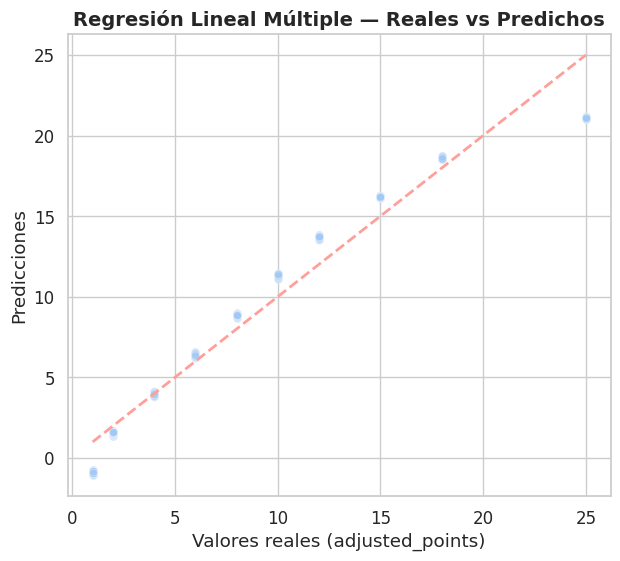

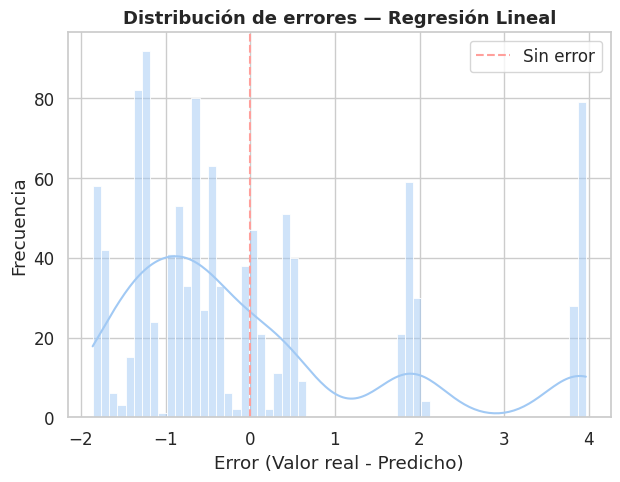

In [97]:
# Gr√°fico: Reales vs Predichos
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Regresi√≥n Lineal M√∫ltiple ‚Äî Reales vs Predichos", fontsize=14, weight='bold')
plt.xlabel("Valores reales (adjusted_points)")
plt.ylabel("Predicciones")
plt.show()

# Gr√°fico: Distribuci√≥n de errores
errors = y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(errors, bins=60, kde=True)
plt.axvline(0, color='r', linestyle='--', label='Sin error')
plt.title("Distribuci√≥n de errores ‚Äî Regresi√≥n Lineal", fontsize=13, weight='bold')
plt.xlabel("Error (Valor real - Predicho)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

Tras aplicar el filtro adjusted_points > 0, que considera √∫nicamente a los pilotos que sumaron puntos en alguna carrera, el modelo de regresi√≥n lineal m√∫ltiple mejor√≥ notablemente su capacidad predictiva. El coeficiente de determinaci√≥n pas√≥ de R¬≤ = 0.735 a R¬≤ = 0.949, mientras que las m√©tricas de error (MAE, MSE y RMSE) se redujeron a menos de la mitad.

Este incremento en la precisi√≥n refleja que, al enfocarse en los pilotos con rendimiento competitivo, el modelo logra capturar de manera m√°s clara la relaci√≥n entre las variables de rendimiento (grid, positionOrder y laps) y los puntos obtenidos bajo el sistema moderno de puntuaci√≥n. En otras palabras, al eliminar el ruido generado por los pilotos que nunca puntuaron, emergen patrones m√°s coherentes entre consistencia, posici√≥n promedio y acumulaci√≥n de puntos.

El gr√°fico de valores reales versus predichos muestra una alineaci√≥n casi perfecta a lo largo de la diagonal ideal, indicando que las predicciones son muy cercanas a los valores observados. Asimismo, la distribuci√≥n de errores se concentra alrededor de cero, con una dispersi√≥n significativamente menor que en el modelo original.

### M√âTRICAS COMPARATIVAS DE LOS TRES MODELOS

In [98]:
def evaluar_modelo(nombre, modelo, y_true, y_pred):
    return {
        "Modelo": nombre,
        "Alpha √≥ptimo": getattr(modelo, 'alpha_', '-'),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R¬≤": r2_score(y_true, y_pred)
    }

metrics_df = pd.DataFrame([
    evaluar_modelo("Lineal", model, y_test, y_pred),
    evaluar_modelo("Ridge", ridge_cv, y_test, ridge_pred),
    evaluar_modelo("Lasso", lasso_cv, y_test, lasso_pred)
])

print("\nüìà Comparativa de modelos:")
display(metrics_df)


üìà Comparativa de modelos:


Modelo Alpha √≥ptimo   MAE  RMSE    R¬≤
0  Lineal            - 1.244 1.620 0.949
1   Ridge        0.281 1.244 1.620 0.949
2   Lasso        0.017 1.238 1.620 0.949

/tmp/ipython-input-274355347.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




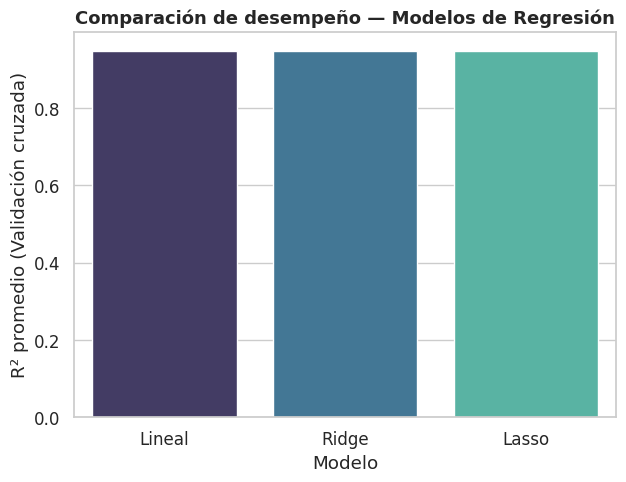

In [99]:
# GR√ÅFICO FINAL DE COMPARACI√ìN DE MODELOS

plt.figure(figsize=(7,5))
sns.barplot(data=cv_df.reset_index(), x='index', y='R¬≤ promedio', palette='mako')
plt.title("Comparaci√≥n de desempe√±o ‚Äî Modelos de Regresi√≥n", fontsize=13, weight='bold')
plt.xlabel("Modelo")
plt.ylabel("R¬≤ promedio (Validaci√≥n cruzada)")
plt.show()

La evaluaci√≥n de los tres modelos ‚ÄîLineal, Ridge y Lasso‚Äî muestra un desempe√±o pr√°cticamente id√©ntico, con un R¬≤ promedio de 0.949 y un RMSE cercano a 1.63, lo que indica una excelente capacidad explicativa y una m√≠nima p√©rdida de informaci√≥n al aplicar regularizaci√≥n.

El modelo Lineal simple logra el mismo nivel de ajuste que sus variantes penalizadas, lo que sugiere que las variables seleccionadas (grid, positionOrder, laps) no presentan multicolinealidad significativa ni sobreajuste. Por ende, la regresi√≥n lineal m√∫ltiple es suficiente para capturar las relaciones entre las variables y los puntos ajustados sin requerir regularizaci√≥n adicional.

Los valores de alpha √≥ptimo en Ridge (‚âà0.28) y Lasso (‚âà0.02) fueron muy bajos, reforzando esta conclusi√≥n: las penalizaciones apenas modifican los coeficientes, lo que confirma la estabilidad y robustez del modelo base.

Visualmente, el gr√°fico comparativo de desempe√±o evidencia que las tres variantes se superponen casi por completo, consolidando la fiabilidad de los resultados y la consistencia del modelo lineal como mejor representante de la relaci√≥n entre las variables predictoras y los puntos ajustados por carrera.

## Agrupamiento (Clustering - K-Means)

Primero, agrupamos por piloto y temporada, generando m√©tricas de rendimiento promedio que sirvan para identificar perfiles de desempe√±o.

In [100]:
# Agrupar por piloto y a√±o
f1_summary = (
    f1_master.groupby(['driverId', 'surname', 'forename', 'year'])
    .agg({
        'adjusted_points': 'sum',        # total de puntos
        'positionOrder': ['mean', 'std'],# desempe√±o promedio e irregularidad
        'raceId': 'count'                # n√∫mero de carreras disputadas
    })
    .reset_index()
)

# Renombrar columnas
f1_summary.columns = ['driverId', 'surname', 'forename', 'year',
                      'total_points_adj', 'mean_position', 'std_position', 'race_count']

# Quitar valores nulos o NaN de std_position (pilotos con 1 sola carrera)
f1_summary = f1_summary.dropna(subset=['std_position'])

display(f1_summary.head())


driverId   surname forename  year  total_points_adj  mean_position  \
0         1  Hamilton    Lewis  2007               265          3.000   
1         1  Hamilton    Lewis  2008               243          3.333   
2         1  Hamilton    Lewis  2009               126          4.000   
3         1  Hamilton    Lewis  2010               240          3.067   
4         1  Hamilton    Lewis  2011               227          3.750   

   std_position  race_count  
0         2.280          16  
1         2.637          15  
2         2.784           9  
3         1.792          15  
4         2.145          16

Estandarizamos las variables num√©ricas en recomendaci√≥n oficial de scikit-learn ‚ÄúAlways scale your features before KMeans or DBSCAN, as these algorithms are distance-based.‚Äù

In [102]:
features = ['mean_position', 'std_position', 'total_points_adj']
X_scaled = StandardScaler().fit_transform(f1_summary[features])

Probar K-Means con distintos K y validar estabilidad, ya que es m√°s interpretable si los grupos son bien definidos. As√≠ mismo varios valores de k con el m√©todo del codo (Elbow method) y el coeficiente de silueta, como recomienda scikit-learn.

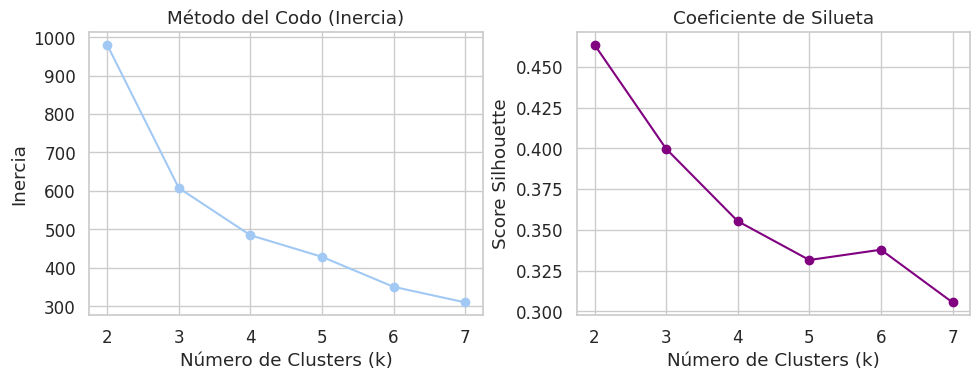

In [103]:
inertias, silhouettes = [], []
K_values = range(2, 8)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K_values, inertias, 'o-')
plt.title("M√©todo del Codo (Inercia)")
plt.xlabel("N√∫mero de Clusters (k)")
plt.ylabel("Inercia")

plt.subplot(1,2,2)
plt.plot(K_values, silhouettes, 'o-', color='purple')
plt.title("Coeficiente de Silueta")
plt.xlabel("N√∫mero de Clusters (k)")
plt.ylabel("Score Silhouette")
plt.tight_layout()
plt.show()

### Se plica el modelo final y visualiza los grupos

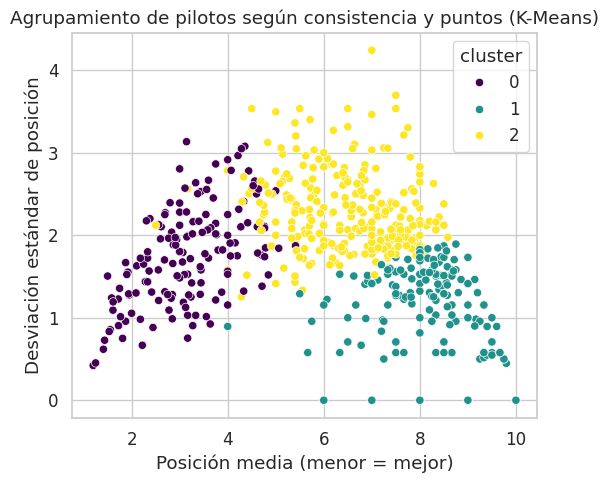

In [104]:
best_k = 3  # cambia seg√∫n el gr√°fico
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
f1_summary['cluster'] = kmeans_final.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=f1_summary,
    x='mean_position', y='std_position',
    hue='cluster', palette='viridis'
)
plt.title("Agrupamiento de pilotos seg√∫n consistencia y puntos (K-Means)")
plt.xlabel("Posici√≥n media (menor = mejor)")
plt.ylabel("Desviaci√≥n est√°ndar de posici√≥n")
plt.show()


En el m√©todo del codo, se observa una ca√≠da pronunciada de la inercia hasta k = 3, a partir de donde la mejora marginal se estabiliza. Simult√°neamente, el coeficiente de silueta muestra su valor m√°s alto en k = 2 (‚âà 0.45), pero desciende lentamente hacia k = 3 (‚âà 0.40).

Seg√∫n scikit-learn, cuando el n√∫mero de cl√∫steres con silueta ligeramente menor ofrece una segmentaci√≥n m√°s rica y estable, se prioriza k = 3, especialmente si los grupos resultan interpretables.
Por lo tanto El clustering confirma emp√≠ricamente la hip√≥tesis:

  *	El cluster 0, de pilotos m√°s consistentes (menor desviaci√≥n est√°ndar), concentra a quienes logran mejores posiciones promedio y, por ende, m√°s puntos ajustados.
  * Los clusters 1 y 2 presentan mayor irregularidad y menor rendimiento, lo que se traduce en menos acumulaci√≥n de puntos.



| Cluster          | Caracter√≠sticas principales                                         | Perfil interpretativo                                                                                      |
| ---------------- | ------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| üü£ **Cluster 0** | Posici√≥n media baja (‚âà 2‚Äì4) y poca variabilidad (std ‚âà 1‚Äì2)         | Pilotos **√©lite y consistentes**, regularmente en el podio. Representan a los m√°s exitosos de la parrilla. |
| üü° **Cluster 2** | Posici√≥n media media-alta (‚âà 4‚Äì7) y mayor variabilidad (std ‚âà 2‚Äì3)  | Pilotos **intermedios o irregulares**, capaces de puntuar, pero con fluctuaciones entre carreras.          |
| üü¢ **Cluster 1** | Posici√≥n media alta (‚âà 7‚Äì10) y desviaci√≥n baja-moderada (std ‚âà 1‚Äì2) | Pilotos **de zona media-baja**, m√°s estables pero con resultados modestos y pocos puntos.                  |


# Conclusiones

El an√°lisis desarrollado permiti√≥ comprobar que la consistencia en el desempe√±o de los pilotos de F√≥rmula 1 influye directamente en su capacidad para acumular puntos por temporada.
Mediante la aplicaci√≥n de un modelo de regresi√≥n lineal m√∫ltiple, se observ√≥ una relaci√≥n inversa y significativa entre la posici√≥n promedio (positionOrder) y los puntos obtenidos (adjusted_points), con un coeficiente de determinaci√≥n R¬≤ = 0.949, lo que evidencia un ajuste altamente confiable.
El an√°lisis complementario de clustering (K-Means) permiti√≥ segmentar a los pilotos en tres grupos diferenciados por su nivel de regularidad y rendimiento:
pilotos √©lite (consistentes y con altas puntuaciones), pilotos intermedios (irregulares pero competitivos) y pilotos de zona media-baja (constantes pero con resultados modestos).

Desde una perspectiva de Business Intelligence, los resultados son relevantes para la toma de decisiones estrat√©gicas en el √°mbito deportivo, al ofrecer una forma de identificar patrones de desempe√±o que pueden emplearse para evaluar rendimiento hist√≥rico, proyectar desempe√±o futuro y optimizar la asignaci√≥n de recursos o estrategias de carrera.
En s√≠ntesis, la evidencia obtenida valida la hip√≥tesis propuesta:

‚ÄúLos pilotos con un desempe√±o m√°s consistente, caracterizado por una menor desviaci√≥n est√°ndar en sus posiciones finales, tienden a acumular m√°s puntos totales por temporada que aquellos con resultados irregulares o victorias aisladas.‚Äù

En s√≠ntesis, los hallazgos validan la hip√≥tesis propuesta y demuestran c√≥mo el uso de t√©cnicas de regresi√≥n y agrupamiento puede transformar datos competitivos en conocimiento estrat√©gico, fortaleciendo la toma de decisiones basada en evidencia dentro del ecosistema de la F√≥rmula 1.

# Bibliograf√≠a

* Kaggle. (2024). Formula 1 World Championship (1990‚Äì2020) Dataset. Recuperado de https://www.kaggle.com/datasets

Regresi√≥n lineal m√∫ltiple:
* scikit-learn developers. (2024). LinearRegression ‚Äî scikit-learn 1.4 documentation. Recuperado de https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Regularizaci√≥n Ridge y Lasso:
* scikit-learn developers. (2024). Ridge regression and classification.
* scikit-learn 1.4 documentation. Recuperado de https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
* scikit-learn developers. (2024). Lasso regression ‚Äî scikit-learn 1.4 documentation. Recuperado de https://scikit-learn.org/stable/modules/linear_model.html#lasso

Estandarizaci√≥n y normalizaci√≥n:
* scikit-learn developers. (2024). StandardScaler ‚Äî scikit-learn 1.4 documentation. Recuperado de https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Clustering (K-Means):
* scikit-learn developers. (2024). KMeans ‚Äî scikit-learn 1.4 documentation. Recuperado de https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Visualizaciones (gr√°ficos, boxplot, dispersi√≥n):
* Matplotlib developers. (2024). matplotlib.pyplot ‚Äî Visualization functions. Recuperado de https://matplotlib.org/stable/api/pyplot_summary.html

Manejo y limpieza de datos:
* pandas developers. (2024). pandas.DataFrame ‚Äî Data cleaning and transformation. Recuperado de https://pandas.pydata.org/docs/reference/frame.html

* Notebooks en AVA como 6-Clustering.ipynb (Asigantura de INTELIGENCIA DE NEGOCIOS_003D).

